#Exploring the Data#

All unadjusted exploratory analysis (not dropping any null values for discrimination score or vascular age)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

%matplotlib inline

data = pd.read_csv('991_CleanedData.csv', low_memory=False)

In [64]:
data['RACE'] = data.ETHNIC.map({1:'Black', 8:'Asian', 9:'Asian', 10:'Caucasian', 13:'Hispanic'})

##Checking the Distribution and Information for Individual Variables##

Variables to explore:
- Discrimination score
- Race reason
- Age
- Perceived Stress score
- Income
- Degree
- Physical Activity
- BMI
- Baseline lipid vascular age
- C-reactive protein level

###Discrimination###

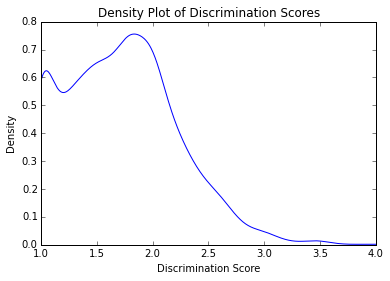

In [65]:
data.DISC_SCORE0.plot(kind='density', xlim=(1,4), title='Density Plot of Discrimination Scores')
plt.xlabel('Discrimination Score')
plt.ylabel('Density')

Unfortunately not normally distributed.

In [66]:
data.DISC_SCORE0.describe()

count    3296.000000
mean        1.720505
std         0.501427
min         1.000000
25%         1.300000
50%         1.700000
75%         2.000000
max         4.000000
Name: DISC_SCORE0, dtype: float64

In [67]:
data.DISC_CAT0.value_counts(dropna=False)

HIGH    1668
LOW     1634
Name: DISC_CAT0, dtype: int64

A participant is said to have experienced high perceived discrimination if she answered "Often" or "Sometimes" to any of the 10 items on the discrimination scale. About half (50%) of participants noted they experienced "High" discrimination.

###Reason for Discrimination###

Participants who were classified as having High perceived discrimination were asked to choose what she believed to be the main reason for this discrimination.

- 1 = Race
- 2 = Ethnicity
- 3 = Gender
- 4 = Age
- 5 = Income Level
- 6 = Language
- 7 = Physical Appearance
- 8 = Sexual Orientation
- 9 = Other reason

In [68]:
data.MAINREA0.value_counts(sort=False, dropna=False)

NaN    1791
 1      426
 2       49
 3      202
 4       77
 5       90
 6       61
 7      184
 8       24
 9      398
Name: MAINREA0, dtype: int64

Of the 1,511 participants who recorded a reason for discrimination, 475 (31.4%) attributed their discrimination to their racial or ethnic identity (Race was the most frequent reason, followed by 'Other' and then Gender).

###Age###

In [69]:
data.AGE0.describe()

count    3297.000000
mean       45.849560
std         2.689278
min        42.000000
25%        44.000000
50%        46.000000
75%        48.000000
max        53.000000
Name: AGE0, dtype: float64

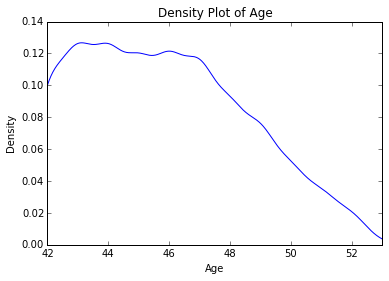

In [70]:
data.AGE0.plot(kind='density', xlim=(42, 53), title='Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

###Perceived Stress Score###

Note: minimum perceived stress score is 4, maximum possible is 20.

In [71]:
data.P_STRESS.describe()

count    3194.000000
mean        8.596744
std         2.952946
min         4.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        19.000000
Name: P_STRESS, dtype: float64

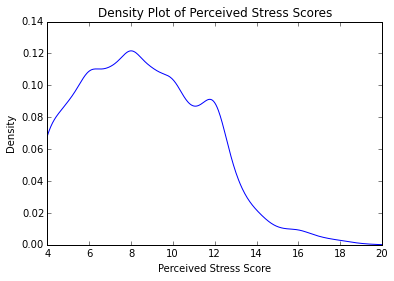

In [72]:
data.P_STRESS.plot(kind='density', xlim=(4,20), title='Density Plot of Perceived Stress Scores')
plt.xlabel('Perceived Stress Score')
plt.ylabel('Density')

###Income###

There are 3,212 participants with income information. The key for income scores is:

- 1 = Less than 19,999
- 2 = 20-49,999
- 3 = 50-99,999
- 4 = 100,000 or more

In [73]:
data.INCOME0.value_counts(sort=False, dropna=False)

NaN      90
 1      490
 2     1088
 3     1162
 4      472
Name: INCOME0, dtype: int64

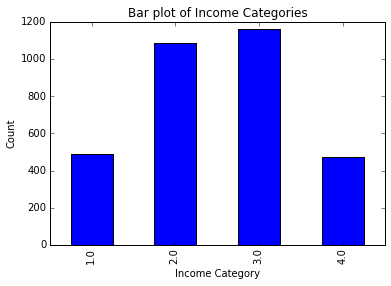

In [74]:
data.INCOME0.value_counts(sort=False).plot(kind='bar', title='Bar plot of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')

###Education###

Key for "DEGREE" is:

- 1 = Less than High School
- 2 = High School Graduate
- 3 = Some College/Technical School
- 4 = College Graduate
- 5 = Post Graduate Education

In [75]:
data.DEGREE.value_counts(sort=False, dropna=False)

NaN      31
 1      238
 2      581
 3     1051
 4      661
 5      740
Name: DEGREE, dtype: int64

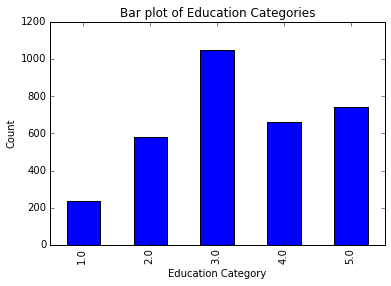

In [76]:
data.DEGREE.value_counts(sort=False).plot(kind='bar', title='Bar plot of Education Categories')
plt.xlabel('Education Category')
plt.ylabel('Count')

It seems like education is skewed slightly to the right.

###Physical Activity###

"Compared to other women your age, how would you rate your physical activity?"

- 1 = Much less
- 2 = Somewhat less
- 3 = the same
- 4 = somewhat more
- 5 = much more

In [77]:
data.PHY_ACT.value_counts(sort=False, dropna=False)

NaN     135
 1      147
 2      494
 3     1271
 4      830
 5      425
Name: PHY_ACT, dtype: int64

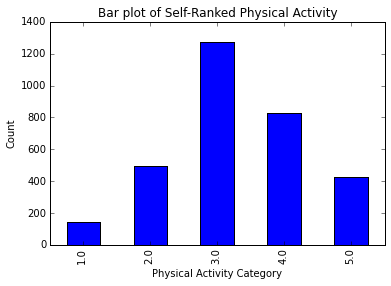

In [78]:
data.PHY_ACT.value_counts(sort=False).plot(kind='bar', title='Bar plot of Self-Ranked Physical Activity')
plt.xlabel('Physical Activity Category')
plt.ylabel('Count')

###Body Mass Index###

Measured in kg/m^2

Categories for BMI follow WHO classification guidelines.

- Less than 18.5: Underweight
- Greater than 18.5, less than 25: Normal
- Greater than 25, less than 30: Overweight
- Greater than 30: Obese

In [79]:
data.BMI0.describe()

count    3260.000000
mean       28.269584
std         7.218708
min        14.989652
25%        22.891217
50%        26.655319
75%        32.138689
max        64.838400
Name: BMI0, dtype: float64

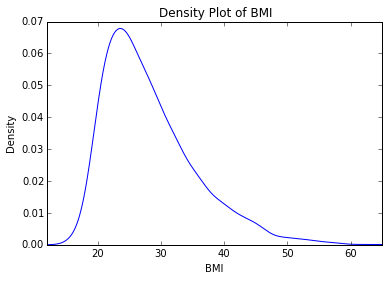

In [80]:
data.BMI0.plot(kind='density', xlim=(12,65), title='Density Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')

In [81]:
data.BMI_CAT.value_counts(sort=False, dropna=False)

NaN                  42
0_Underweight        37
2_Overweight        876
1_HealthyWeight    1271
3_Obese            1076
Name: BMI_CAT, dtype: int64

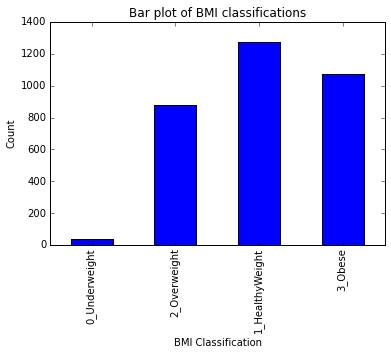

In [82]:
data.BMI_CAT.value_counts(sort=False).plot(kind='bar', title='Bar plot of BMI classifications')
plt.xlabel('BMI Classification')
plt.ylabel('Count')

Not really sure why it won't sort correctly...

###Lipid Vascular Age###

In [87]:
data.LV_AGE0.describe()

count    3267.000000
mean       46.026018
std        14.874169
min        21.000000
25%        36.000000
50%        43.000000
75%        52.000000
max       168.000000
Name: LV_AGE0, dtype: float64

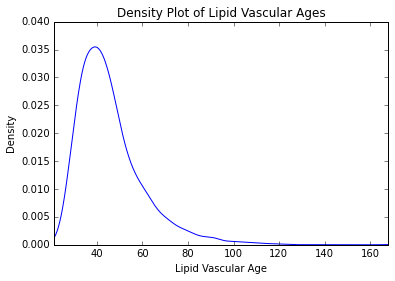

In [93]:
data.LV_AGE0.plot(kind='density', xlim=(21,168), title='Density Plot of Lipid Vascular Ages')
plt.xlabel('Lipid Vascular Age')
plt.ylabel('Density')

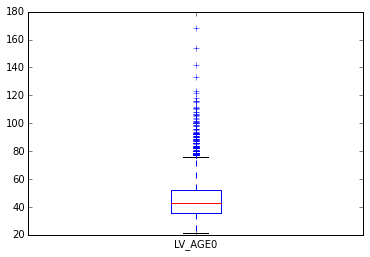

In [97]:
data.LV_AGE0.plot(kind='box')

In [89]:
data.LV_AGE_DIFF0.describe()

count    3267.000000
mean        0.176002
std        14.346510
min       -22.000000
25%        -9.000000
50%        -3.000000
75%         6.000000
max       117.000000
Name: LV_AGE_DIFF0, dtype: float64

The fact that there is a 117 year difference between vascular age and actual age for one participant is interesting/scary.

For fun: that participant is 51 years old, has an average systolic blood pressure of 195, cholesterol level is 328, hdl level is 58, takes blood pressure medication, and is not a smoker.

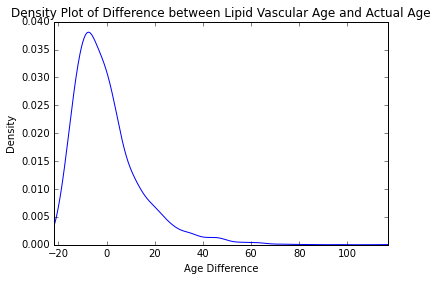

In [94]:
data.LV_AGE_DIFF0.plot(kind='density', xlim=(-22,117), title='Density Plot of Difference between Lipid Vascular Age and Actual Age')
plt.xlabel('Age Difference')
plt.ylabel('Density')

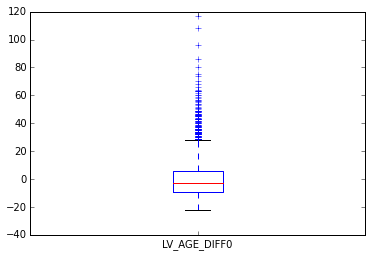

In [98]:
data.LV_AGE_DIFF0.plot(kind='box')

In [90]:
data.LV_AGE_PCT0.describe()

count    3267.000000
mean        0.001948
std         0.310947
min        -0.500000
25%        -0.208333
50%        -0.065217
75%         0.119048
max         2.347826
Name: LV_AGE_PCT0, dtype: float64

In [91]:
data['LV_AGE_ABSPCT0'] = data.LV_AGE_PCT0.abs()

In [92]:
data.LV_AGE_ABSPCT0.describe()

count    3267.000000
mean        0.225746
std         0.213811
min         0.000000
25%         0.086957
50%         0.186047
75%         0.297872
max         2.347826
Name: LV_AGE_ABSPCT0, dtype: float64

##Discrimination##

**What are the statistics for discrimination scores, and how does it compare across race, income, and perceived stress?**

In [83]:
data.DISC_SCORE0.describe()

count    3296.000000
mean        1.720505
std         0.501427
min         1.000000
25%         1.300000
50%         1.700000
75%         2.000000
max         4.000000
Name: DISC_SCORE0, dtype: float64

Discrimination scores are converted so that they correspond to the Likert scale: 1 = Never, 2 = Rarely, 3 = Sometimes, 4 = Often. The average discrimination score was 1.72 (between Never and Rarely) with a standard deviation of 0.50.

In [84]:
data.groupby('RACE').DISC_SCORE0.describe()

RACE            
Asian      count     531.000000
           mean        1.723833
           std         0.491283
           min         1.000000
           25%         1.300000
           50%         1.700000
           75%         2.000000
           max         4.000000
Black      count     931.000000
           mean        1.924749
           std         0.533285
           min         1.000000
           25%         1.500000
           50%         1.900000
           75%         2.300000
           max         3.900000
Caucasian  count    1549.000000
           mean        1.686063
           std         0.431609
           min         1.000000
           25%         1.400000
           50%         1.700000
           75%         2.000000
           max         3.500000
Hispanic   count     285.000000
           mean        1.234308
           std         0.373566
           min         1.000000
           25%         1.000000
           50%         1.000000
           75%         

Across race, black participants had the highest average discrimination score (mean = 1.92, std = 0.53) followed by Asians (mean = 1.72, std = 0.49), Caucasisns (mean = 1.69, std = 0.43) and finally Hispanics (mean = 1.23, std = 0.37). It is a little surprising that Hispanics have the lowest perceived discrimination score. The ranges are also depicted in the boxplot below.

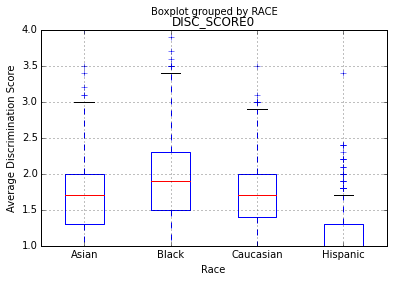

In [85]:
data.boxplot(column="DISC_SCORE0", by = "RACE")
plt.xlabel('Race')
plt.ylabel('Average Discrimination Score')

**What are the statistics for discrimination scores, and how does it compare across income, and perceived stress?**